In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline 

In [63]:
x = np.random.random((20000,2))*2.0 - 1.0
y = np.linalg.norm(x,axis=-1) > 0.8
y = y.astype(np.float32)
print(x.shape, y.shape)

(20000, 2) (20000,)


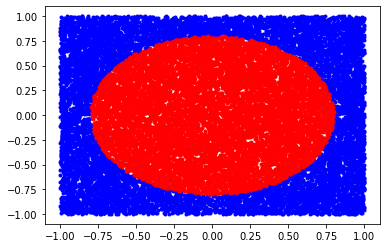

In [64]:
x_pos = x[y==1.0]
x_neg = x[y==0.0]
plt.scatter(x_pos[:,0],x_pos[:,1], marker=".", c="blue")
plt.scatter(x_neg[:,0],x_neg[:,1], marker=".", c="red")

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.2)
print(x_train.shape,x_test.shape, y_train.shape,y_test.shape)

(16000, 2) (4000, 2) (16000,) (4000,)


In [67]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(Dense(16, activation="relu", input_shape=(2,)))
model.add(Dense(16, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="mse", optimizer="adam", metrics=["acc"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                48        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [68]:
hist = model.fit(x_train,y_train, 
                 validation_data=(x_test,y_test),
                 batch_size=40, epochs=30, verbose=1)

Epoch 1/30
400/400 [==============================] - 1s 2ms/step - loss: 0.1524 - acc: 0.7952 - val_loss: 0.0425 - val_acc: 0.9712
Epoch 2/30
400/400 [==============================] - 1s 1ms/step - loss: 0.0280 - acc: 0.9803 - val_loss: 0.0232 - val_acc: 0.9758
Epoch 3/30
400/400 [==============================] - 1s 2ms/step - loss: 0.0180 - acc: 0.9852 - val_loss: 0.0156 - val_acc: 0.9898
Epoch 4/30
400/400 [==============================] - 1s 2ms/step - loss: 0.0142 - acc: 0.9877 - val_loss: 0.0137 - val_acc: 0.9877
Epoch 5/30
400/400 [==============================] - 1s 2ms/step - loss: 0.0122 - acc: 0.9890 - val_loss: 0.0115 - val_acc: 0.9905
Epoch 6/30
400/400 [==============================] - 1s 2ms/step - loss: 0.0109 - acc: 0.9892 - val_loss: 0.0113 - val_acc: 0.9890
Epoch 7/30
400/400 [==============================] - 1s 2ms/step - loss: 0.0101 - acc: 0.9896 - val_loss: 0.0091 - val_acc: 0.9933
Epoch 8/30
400/400 [==============================] - 1s 1ms/step - loss: 0.

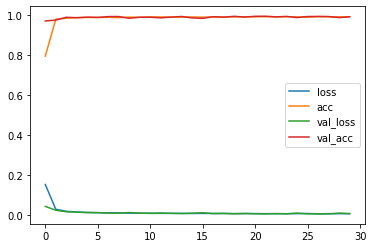

In [69]:
df = pd.DataFrame(hist.history)
df.plot()

(4000,)


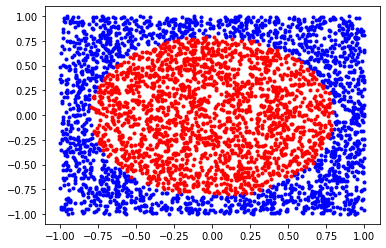

In [70]:
y_pred = model.predict(x_test).flatten()
print(y_pred.shape)
x_pos = x_test[y_pred >= 0.5]
x_neg = x_test[y_pred < 0.5]
plt.scatter(x_pos[:,0],x_pos[:,1], marker=".", c="blue")
plt.scatter(x_neg[:,0],x_neg[:,1], marker=".", c="red")

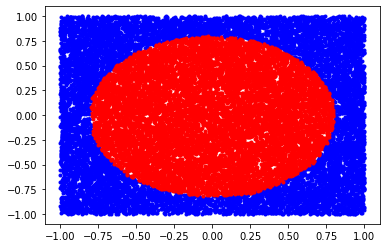

In [71]:
y_pred = model.predict(x).flatten()
x_pos = x[y_pred >= 0.5]
x_neg = x[y_pred < 0.5]
plt.scatter(x_pos[:,0],x_pos[:,1], marker=".", c="blue")
plt.scatter(x_neg[:,0],x_neg[:,1], marker=".", c="red")